<a href="https://colab.research.google.com/github/sbogde/scikit-regressions-and-confessions/blob/main/week4_01_lr_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [50]:
# Check if running in Google Colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive')
    file_path = '/content/drive/My Drive/Colab Notebooks/BankNoteAuthenticity.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './BankNoteAuthenticity.csv'  # Local path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
dataset = pd.read_csv(file_path)

In [52]:
dataset.head()

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage,Authenticity,Auth
0,3.62160,8.6661,-2.8073,-0.44699,0,Yes
1,4.54590,8.1674,-2.4586,-1.46210,0,Yes
2,3.86600,-2.6383,1.9242,0.10645,0,Yes
3,3.45660,9.5228,-4.0112,-3.59440,0,Yes
4,0.32924,-4.4552,4.5718,-0.98880,0,Yes


In [53]:
# dataset

In [54]:
X = dataset.iloc[ : , :4]
X

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [55]:
Y = dataset.iloc[ : , 4]
Y

,Authenticity
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


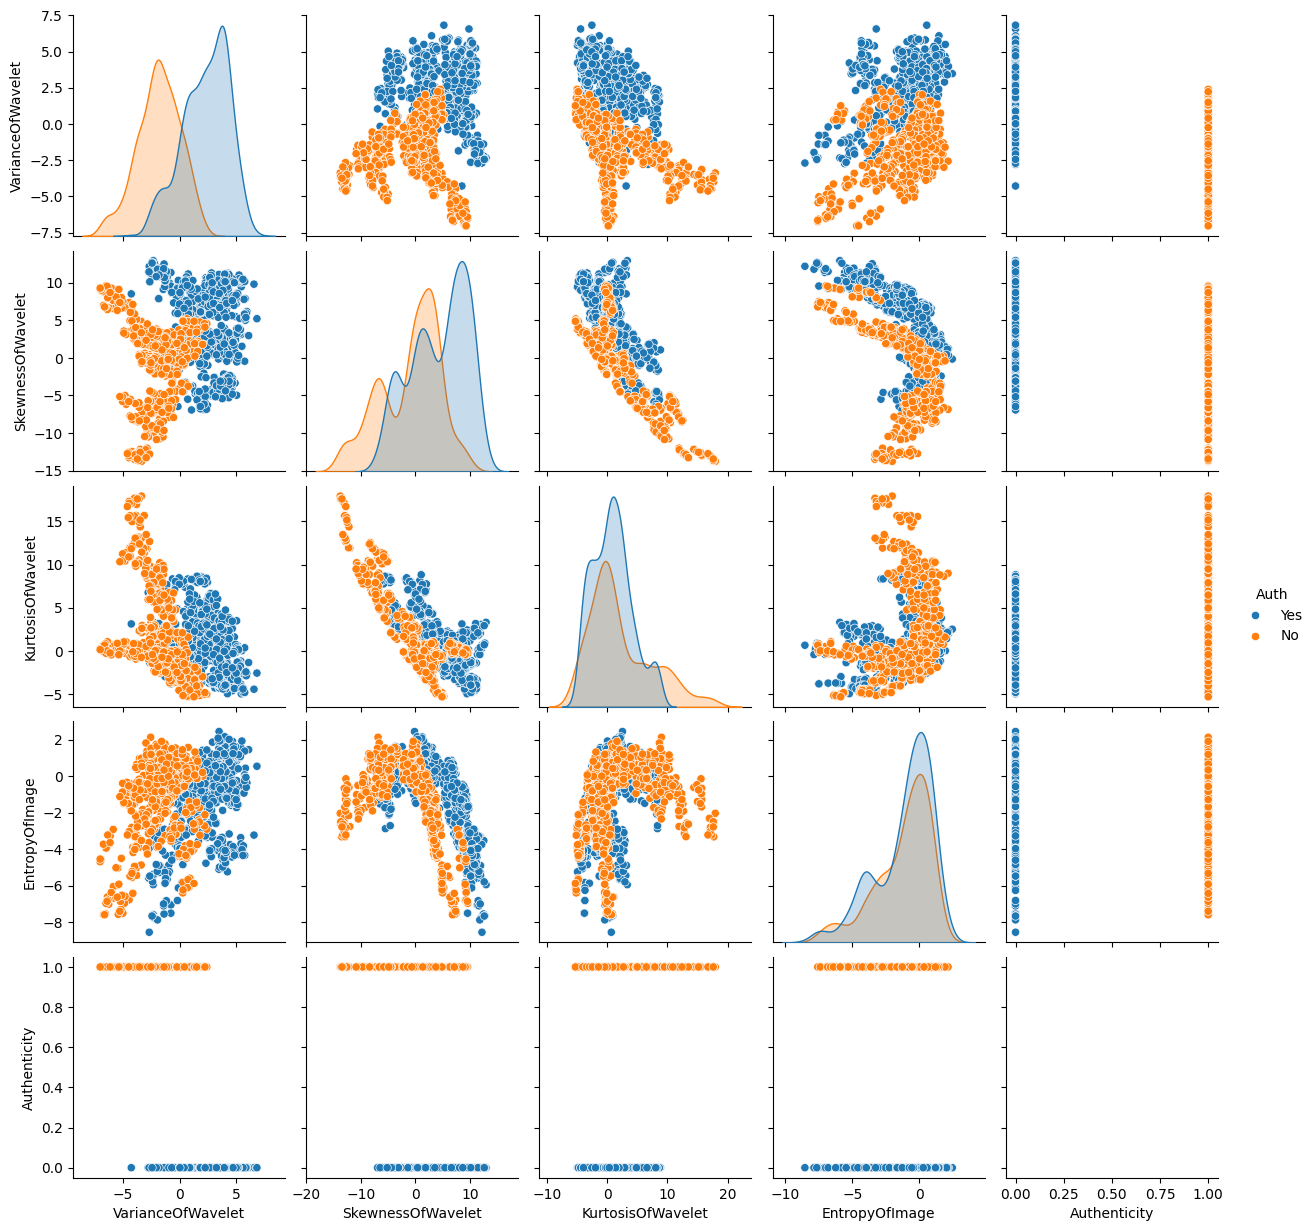

In [56]:
sb.pairplot(dataset, hue='Auth')

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [59]:
predictions = classifier.predict(X_test)

In [60]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [61]:
y_test

,Authenticity
1023,1
642,0
1196,1
31,0
253,0
...,...
1342,1
251,0
1256,1
966,1


In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [64]:
print(confusion_matrix(y_test, predictions))

[[155   2]
 [  0 118]]


In [65]:
conf_matrix_norm = confusion_matrix(y_test, predictions, normalize='true')
print("\nNormalised Confusion Matrix:")
print(conf_matrix_norm)


Normalised Confusion Matrix:
[[0.98726115 0.01273885]
 [0.         1.        ]]


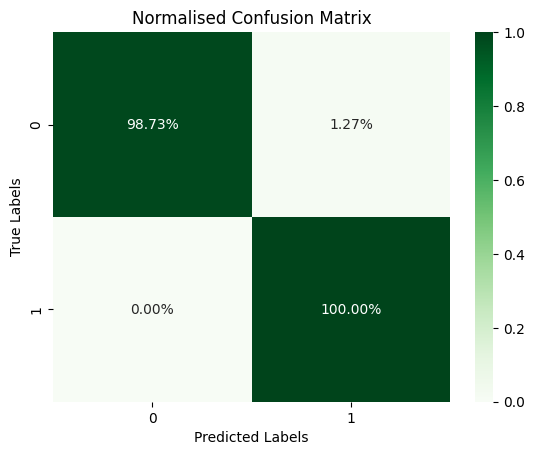

In [66]:
# Visualise the normalised confusion matrix as a heatmap
sb.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Greens')
plt.title("Normalised Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()